In [1]:
import sys
import os

sys.path.append(os.path.abspath("./.."))

from utilities import dipole_utilities as ut
import numpy as np
import matplotlib.pyplot as plt


We load all the Pantheon+ dataset

In [2]:
# Load all columns as strings
plus0 = np.genfromtxt(
    "../data/pantheon_shoes.dat",
    usecols=(4, 10, 12, 13, 26, 27, 6, 2),  # Columns to extract
    skip_header=1,

)

# Convert columns to the correct types manually
plus0 = np.array(plus0)  # Ensure it's a NumPy array
zcmb = plus0[:, 0].astype(float)  # Convert column 0 to float
mu = plus0[:, 1].astype(float)    # Convert column 1 to float
ceph_dis = plus0[:, 2].astype(float)  # Column 2 to float
is_cal = plus0[:, 3].astype(float)    # Column 3 to float
ra = plus0[:, 4].astype(float)        # Column 4 to float
dec = plus0[:, 5].astype(float)       # Column 5 to float
zhel = plus0[:, 6].astype(float)      # Column 6 to float
zhd = plus0[:, 7].astype(float)       # Column 7 to float


In [19]:
z_mono_bulk=ut.z_monopole_bulk(zhel, -95, 323, 199, -51.2, 74.1, 0.317, 369.82, 264.021, 48.253, ra, dec)

z_mono_bulk_quadrupole=np.zeros(1701)

for i in range(1701):
    z_mono_bulk_quadrupole[i]=ut.z_monopole_bulk_quadrupole(zhel[i], -90, 322,200,-53.1, 74.1, 0.317, ut.symmetric_traceless_matrix(-13, 51, 33, 37, 47), 369,167.942, -6.944,ra[i],dec[i])


In [25]:
monopole=np.zeros(1701)
mono_bulk=np.zeros(1701)
mono_bulk_quadrupole=np.zeros(1701)

for i in range(1701):
    monopole[i]=ut.monopole(zhel[i], 74.1, 0.317)
    mono_bulk[i]=ut.monopole(z_mono_bulk[i], 74.1, 0.317)
    mono_bulk_quadrupole[i]=ut.monopole(z_mono_bulk_quadrupole[i], 74.1, 0.317)

Text(0, 0.5, 'magn')

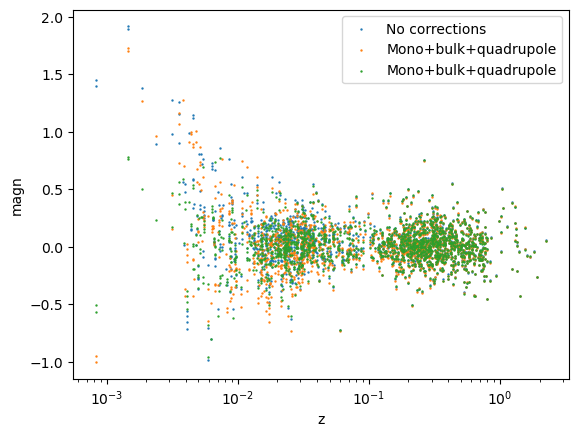

In [31]:
plt.scatter(zhel, mu-monopole, s=0.5, label='No corrections')
plt.scatter(zhel, mu-mono_bulk, s=0.5,label='Mono+bulk+quadrupole')
plt.scatter(zhel, mu-mono_bulk_quadrupole, s=0.5,label='Mono+bulk+quadrupole')

plt.legend()
plt.xscale('log')
plt.xlabel('z')
plt.ylabel('magn')

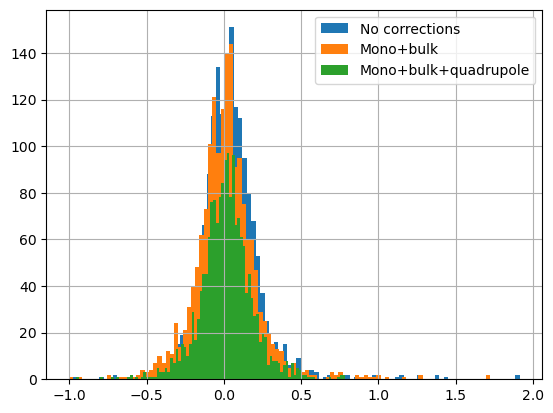

In [30]:
plt.hist(mu-monopole, bins=100, label='No corrections')
plt.hist(mu-mono_bulk, bins=100, label='Mono+bulk')

plt.hist(mu-mono_bulk_quadrupole, bins=100, label='Mono+bulk+quadrupole')


plt.grid()
plt.legend()